In [1]:
# STANDARD LIBRARIES
import pandas as pd
import numpy as np
import pickle

# VISUALS
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import categorical

%matplotlib inline

# Read Files

**Main**

In [2]:
main = pd.read_csv("../data/clean-data/main-engineered.csv")
main.drop(columns=["Unnamed: 0"], inplace=True)

main["zipcode"] = main["zipcode"].astype(str)
main["zipcode"] = main["zipcode"].apply(lambda x: "0" + x[:4]) 
zipcode_list = set(main["zipcode"])

**X_sel**

In [9]:
X_sel = pd.read_csv("../assets/models/X_sel.csv")
X_sel.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
# vis_df = main.drop(columns=[
#     "label_zip",
#     "label_street",
# #     "zipcode",
#     "zip_street",
#     "zip_num_street"
# ])

**Column Categories**

In [21]:
# LISTS TO PERFORM EDA ON
data_cols = pd.read_pickle("../assets/variables/data_cols")
pw_cols = pd.read_pickle("../assets/variables/pw_cols")
fire_cols = pd.read_pickle("../assets/variables/fire_cols")
requests_cols = pd.read_pickle("../assets/variables/requests_cols")

all_cols = [data_cols,
            pw_cols,
            fire_cols,
            requests_cols]

# data_cols.remove("zipcode")
# pw_cols.remove("zipcode")
# fire_cols.remove("zipcode")
# requests_cols.remove("zipcode")

for col in main.columns:
    for lst in all_cols:
        if "label" in col:
            lst.append(col)

# DATA COLS
filename = "../assets/variables/data_cols"
outfile = open(filename, "wb")
pickle.dump(data_cols, outfile)
outfile.close()

# PW COLS
filename = "../assets/variables/pw_cols"
outfile = open(filename, "wb")
pickle.dump(pw_cols, outfile)
outfile.close()

# FIRE COLS
filename = "../assets/variables/fire_cols"
outfile = open(filename, "wb")
pickle.dump(fire_cols, outfile)
outfile.close()

# REQUESTS COLS
filename = "../assets/variables/requests_cols"
outfile = open(filename, "wb")
pickle.dump(requests_cols, outfile)
outfile.close()

# General

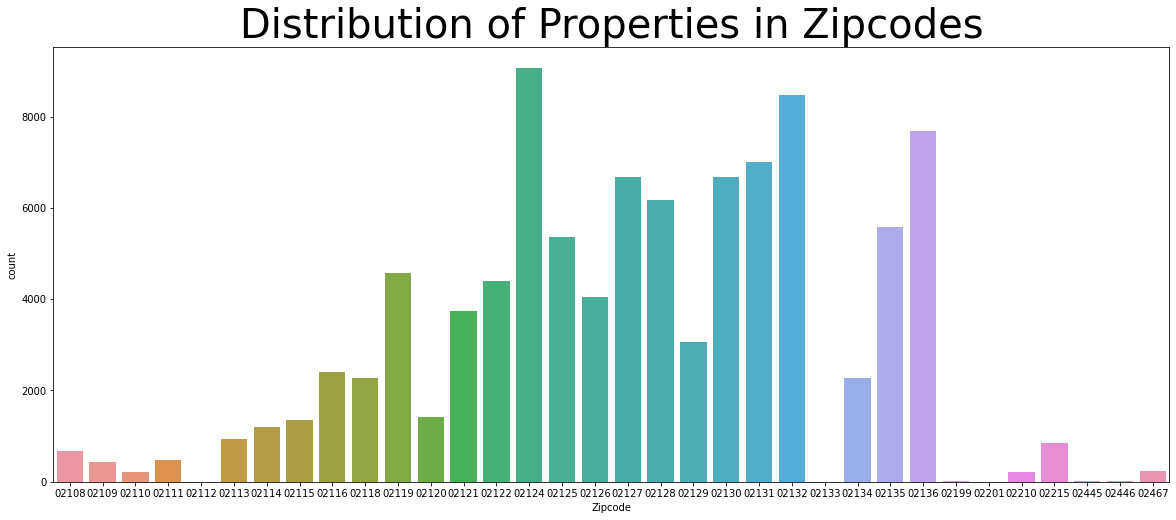

In [6]:
# COUNTS OF PROPERTIES BY ZIPCODE
plt.figure(figsize=(20, 8))
sns.countplot(x=main["zipcode"])
plt.xticks()
plt.title("Distribution of Properties in Zipcodes", fontsize=40)
plt.xlabel("Zipcode")
plt.savefig("../assets/images/zipcode-dist")

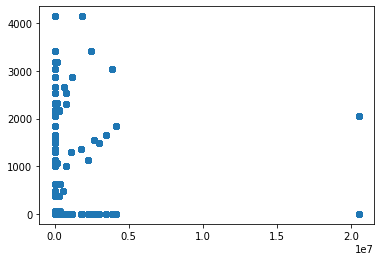

In [206]:
plt.scatter(main["total_fire_loss_zip"], main["sum_pw_viol_count_zip"])

In [201]:
main.columns

Index(['zipcode', 'av_land', 'av_bldg', 'av_total', 'gross_tax',
       'zip_num_street', 'sum_land_value_street', 'sum_bldg_value_street',
       'sum_total_value_street', 'sum_gross_tax_street',
       ...
       'sum_fire_incidents_zip', 'req_latitude', 'req_longitude',
       'requests_total_prop', 'requests_total_street', 'requests_total_zip',
       'req_open_status_prop', 'req_open_status_street', 'req_open_status_zip',
       'label_zip'],
      dtype='object', length=123)

## Fire, Req, PW 

### By Street

In [25]:
fire_incidents_street_max = main.loc[main["sum_fire_incidents_street"].max()]
pw_viol_street_max = main.loc[main["sum_pw_viol_count_street"].max()]
req_street_max = main.loc[main["requests_total_street"].max()]

summ_pw_viol_street= pd.Series(main.groupby("zipcode")["sum_pw_viol_count_street"].sum())
summ_fire_count_street = pd.Series(main.groupby("zipcode")["sum_fire_incidents_street"].sum())
summ_req_total_street = pd.Series(main.groupby("zipcode")["requests_total_street"].sum())

summ_stats_street = pd.DataFrame()
summ_stats_street = summ_stats_street.append(summ_pw_viol_street).T
summ_stats_street = pd.concat([summ_stats_street, 
                               summ_fire_count_street, 
                               summ_req_total_street], axis=1, sort=False)

In [33]:
summ_stats_street["diff_avg_fire_incidents"] = round(summ_stats_street["sum_fire_incidents_street"] -\
                                                     summ_stats_street["sum_fire_incidents_street"].mean(), 2)
summ_stats_street.sort_values(by="sum_fire_incidents_street",
                              ascending=False)

sum_pw_viol_count_street  sum_fire_incidents_street  \
zipcode                                                        
02118                    162329.0                   106434.0   
02116                    214626.0                    71250.0   
02215                     26442.0                    49084.0   
02135                     40692.0                    41636.0   
02128                     50935.0                    38912.0   
02130                     12401.0                    30781.0   
02115                     59167.0                    29482.0   
02124                     52142.0                    27443.0   
02119                     14891.0                    23868.0   
02121                     15246.0                    21363.0   
02127                     23349.0                    21316.0   
02132                      2845.0                    19899.0   
02126                     15802.0                    18889.0   
02125                     38046.0                    18110.0   
02134                     30890.0                    17003.0   
02136                     20337.0                    13940.0   
02122                     19953.0                    13435.0   
02131                     10673.0                    12013.0   
02114                     45719.0                     9541.0   
02120                     52997.0                     8610.0   
02129                     18166.0                     6174.0   
02108                      2992.0                     5618.0   
02109                      6253.0                     4951.0   
02111                      2699.0                     4857.0   
02113                     54233.0                     3959.0   
02210                        53.0                     3409.0   
02110                        50.0                     2344.0   
02467                         5.0                      343.0   
02199                        22.0                      180.0   
02133                         0.0                        0.0   
02112                         0.0                        0.0   
02201                         0.0                        0.0   
02445                         0.0                        0.0   
02446                         0.0                        0.0   

         requests_total_street  diff_avg_fire_incidents  
zipcode                                                  
02118                     17.0                 88056.24  
02116                      0.0                 52872.24  
02215                     97.0                 30706.24  
02135                      0.0                 23258.24  
02128                      0.0                 20534.24  
02130                    259.0                 12403.24  
02115                    138.0                 11104.24  
02124                      0.0                  9065.24  
02119                      0.0                  5490.24  
02121                      0.0                  2985.24  
02127                    756.0                  2938.24  
02132                      0.0                  1521.24  
02126                      0.0                   511.24  
02125                      0.0                  -267.76  
02134                      0.0                 -1374.76  
02136                      0.0                 -4437.76  
02122                     19.0                 -4942.76  
02131                      0.0                 -6364.76  
02114                      0.0                 -8836.76  
02120                      0.0                 -9767.76  
02129                      3.0                -12203.76  
02108                      0.0                -12759.76  
02109                      2.0                -13426.76  
02111                      2.0                -13520.76  
02113                      0.0                -14418.76  
02210                      0.0                -14968.76  
02110                      0.0                -16033.76  
02467                 

In [86]:
total_street_req_pw_fire_df = main.groupby("zipcode")[["requests_total_street", 
                         "sum_pw_viol_count_street", 
                         "sum_fire_incidents_street"]].nunique().sort_values(
    by="sum_fire_incidents_street",
    ascending=False)

In [87]:
total_street_req_pw_fire_df.describe()

requests_total_street  sum_pw_viol_count_street  \
count              34.000000                 34.000000   
mean                2.882353                 24.352941   
std                 4.409114                 16.216121   
min                 1.000000                  1.000000   
25%                 1.000000                  9.250000   
50%                 1.000000                 27.500000   
75%                 1.750000                 36.750000   
max                20.000000                 59.000000   

       sum_fire_incidents_street  
count                  34.000000  
mean                   24.235294  
std                    13.115013  
min                     1.000000  
25%                    19.250000  
50%                    27.000000  
75%                    32.000000  
max                    43.000000

In [90]:
total_street_req_pw_fire_df.head(10)

requests_total_street  sum_pw_viol_count_street  \
zipcode                                                    
02128                        1                        43   
02119                        1                        37   
02121                        1                        37   
02124                        1                        59   
02130                       14                        31   
02135                        1                        43   
02115                       12                        27   
02125                        1                        50   
02126                        1                        33   
02114                        1                        23   

         sum_fire_incidents_street  
zipcode                             
02128                           43  
02119                           43  
02121                           42  
02124                           38  
02130                           37  
02135                           37  
02115                           37  
02125                           36  
02126                           32  
02114                           32

/home/patrick/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/patrick/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/patrick/anaconda3/lib/python3.7/site-pa

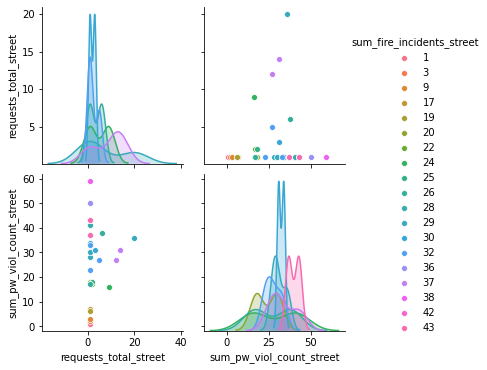

In [88]:
sns.pairplot(total_street_req_pw_fire_df,
             hue="sum_fire_incidents_street",
             kind="scatter")
plt.savefig("../assets/images/fire-req-pw-street-pairplot");

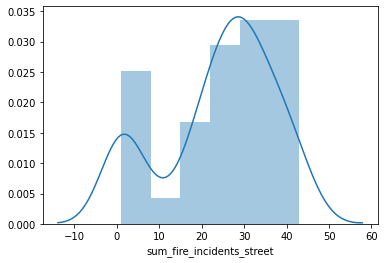

In [94]:
sns.distplot(total_street_req_pw_fire_df["sum_fire_incidents_street"])
plt.savefig("../assets/images/sum_fire_incidents_street-dist");

### By Zip

In [162]:
fire_incidents_zip_max = main.loc[main["sum_fire_incidents_zip"].max()]
pw_viol_zip_max = main.loc[main["sum_pw_viol_count_zip"].max()]
req_zip_max = main.loc[main["requests_total_zip"].max()]

summ_pw_viol_zip = pd.Series(main.groupby("zipcode")["sum_pw_viol_count_zip"].sum())
summ_fire_count_zip = pd.Series(main.groupby("zipcode")["sum_fire_incidents_zip"].sum())
summ_req_total_zip = pd.Series(main.groupby("zipcode")["requests_total_zip"].sum())

summ_stats_zip = pd.DataFrame()
summ_stats_zip = summ_stats_zip.append(summ_pw_viol_zip).T
summ_stats_zip = pd.concat([summ_stats_zip, summ_fire_count_zip, summ_req_total_zip], axis=1, sort=False)

In [167]:
summ_stats_zip.sort_values(by="sum_fire_incidents_zip",
                           ascending=False)

sum_pw_viol_count_zip  sum_fire_incidents_zip  requests_total_zip
zipcode                                                                   
02124                4882196.0               2491867.0                 0.0
02118                2235168.0               1864697.0             96054.0
02130                 676779.0               1629032.0            919200.0
02119                 954600.0               1604148.0                 0.0
02135                1948416.0               1467024.0                 0.0
02128                1521842.0               1444832.0                 0.0
02116                2885675.0               1386225.0                 0.0
02125                2677359.0               1361888.0                 0.0
02121                 657318.0               1165171.0                 0.0
02127                1433790.0                953946.0           2600017.0
02126                 738816.0                811377.0                 0.0
02132                 110062.0                797706.0                 0.0
02115                 922231.0                736374.0            136404.0
02136                 613312.0                715176.0                 0.0
02215                 213462.0                633199.0            115136.0
02122                 815856.0                606300.0             52066.0
02131                 424532.0                591409.0                 0.0
02134                1030077.0                395945.0                 0.0
02129                 596564.0                369963.0             12832.0
02114                 753768.0                345690.0                 0.0
02120                1112938.0                221088.0                 0.0
02111                  36830.0                110585.0              5098.0
02108                  42804.0                 95920.0                 0.0
02113                 974116.0                 80595.0                 0.0
02109                  56340.0                 61699.0              2059.0
02210                    348.0                 51008.0                 0.0
02110                    630.0                 35700.0                 0.0
02467                     15.0                  4420.0                 0.0
02199                     23.0                   488.0                 0.0
02133                      0.0                     0.0                 0.0
02112                      0.0                     0.0                 0.0
02201                      0.0                     0.0                 0.0
02445                      0.0                     0.0                 0.0
02446                      0.0                     0.0                 0.0

In [207]:
summ_stats_zip.describe()

sum_pw_viol_count_zip  sum_fire_incidents_zip  requests_total_zip
count           3.400000e+01            3.400000e+01        3.400000e+01
mean            8.328196e+05            6.480433e+05        1.158490e+05
std             1.066993e+06            6.715638e+05        4.668624e+05
min             0.000000e+00            0.000000e+00        0.000000e+00
25%             9.680000e+03            5.368075e+04        0.000000e+00
50%             6.353150e+05            4.936770e+05        0.000000e+00
75%             1.016087e+06            1.112365e+06        1.544250e+03
max             4.882196e+06            2.491867e+06        2.600017e+06

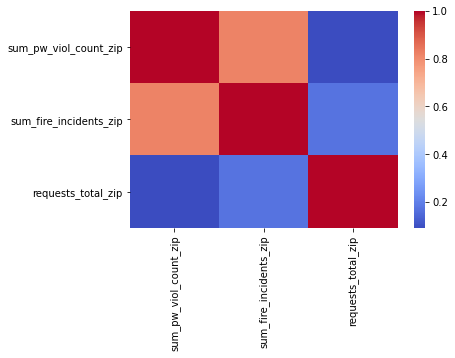

In [209]:
sns.heatmap(summ_stats_zip.corr(),
            cmap="coolwarm")

# Outliers

In [5]:
main.describe()

zipcode  sum_land_value_street  sum_bldg_value_street  \
count  97515.000000           9.751500e+04           9.751500e+04   
mean    2128.597703           1.026189e+08           2.013818e+08   
std       20.415539           1.161361e+09           1.413509e+09   
min     2108.000000           0.000000e+00           0.000000e+00   
25%     2124.000000           3.693800e+06           1.026120e+07   
50%     2127.000000           8.735260e+06           2.591186e+07   
75%     2132.000000           2.964212e+07           8.329224e+07   
max     2467.000000           2.642256e+10           2.997742e+10   

       sum_total_value_street  sum_gross_tax_street  avg_land_value_street  \
count            9.751500e+04          9.751500e+04           9.751500e+04   
mean             3.040007e+08          1.517246e+08           6.480362e+05   
std              2.269549e+09          5.001479e+08           4.935556e+06   
min              0.000000e+00          0.000000e+00           0.000000e+00   
25%              1.451720e+07          1.446606e+07           1.023300e+05   
50%              3.546480e+07          3.476093e+07           1.362808e+05   
75%              1.226704e+08          1.095945e+08           2.148053e+05   
max              3.798420e+10          9.915860e+09           2.919649e+08   

       avg_bldg_value_street  avg_total_value_street  avg_gross_tax_street  \
count           9.751500e+04            9.751500e+04          9.751500e+04   
mean            1.387491e+06            2.035527e+06          1.313543e+06   
std             9.478671e+06            1.315711e+07          9.727829e+06   
min             0.000000e+00            0.000000e+00          0.000000e+00   
25%             3.056879e+05            4.230705e+05          4.294611e+05   
50%             3.918064e+05            5.366588e+05          5.350183e+05   
75%             5.820125e+05            8.048193e+05          7.557135e+05   
max             3.658185e+08            5.130820e+08          1.282705e+09   

       sum_land_value_zip  ...  avg_fire_content_loss_street  \
count        9.751500e+04  ...                  97515.000000   
mean         5.788669e+09  ...                     16.377588   
std          7.882870e+09  ...                    565.862373   
min          4.910000e+04  ...                      0.000000   
25%          1.640405e+09  ...                      0.000000   
50%          2.959507e+09  ...                      0.000000   
75%          5.225780e+09  ...                      0.000000   
max          3.253956e+10  ...                  83333.333333   

       avg_fire_content_loss_zip  req_latitude  req_longitude  \
count               97515.000000  97515.000000   97515.000000   
mean                   13.950316      0.141949      -0.238316   
std                    52.977468      2.447190       4.108547   
min                     0.000000      0.000000     -71.123200   
25%                     0.000000      0.000000       0.000000   
50%                     0.000000      0.000000       0.000000   
75%                     0.000000      0.000000       0.000000   
max                   423.821282     42.383300       0.000000   

       requests_total_street  requests_total_zip  req_open_status_prop  \
count           97515.000000        97515.000000          97515.000000   
mean                0.013259           40.392411              0.002605   
std                 0.343559          733.366457              0.097202   
min                 0.000000            0.000000              0.000000   
25%                 0.000000            0.000000              0.000000   
50%                 0.000000            0.000000              0.000000   
75%                 0.000000            0.000000              0.000000   
max                32.000000        15029.000000             12.000000   

       req_open_status_street  req_open_status_zip     label_zip  
count            97515.000000         97515.000000  97515.000000  
mean                

In [15]:
# A TRADITIONAL OUTLIER IS < 1.5X THE IQR THAN Q1, > 1.5X THE UQR THAN Q3 

q1 = main.quantile(0.25)
q3 = main.quantile(0.75)
iqr = q3 - q1

outliers_df = (main < (q1 - 1.5 * iqr)) |(main > (q3 + 1.5 * iqr))
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

outliers_df = outliers_df.loc[outliers_df["sum_pw_viol_count_zip"] == True].astype(int)

In [18]:
outliers_by_col = {}
outliers_pct = {}

for col in outliers_df:
    outliers_by_col[col] = outliers_df[col].sum()
    
for k, v in outliers_by_col.items():
    outliers_pct[k] = v / main.shape[0]

In [19]:
outliers_by_col

{'av_bldg': 1890,
 'av_land': 2174,
 'av_total': 2098,
 'avg_bldg_value_street': 2095,
 'avg_bldg_value_zip': 2839,
 'avg_fire_content_loss_prop': 121,
 'avg_fire_content_loss_street': 1363,
 'avg_fire_content_loss_zip': 2854,
 'avg_fire_prop_loss_street': 1290,
 'avg_fire_prop_loss_zip': 2854,
 'avg_gross_tax_street': 2038,
 'avg_gross_tax_zip': 1870,
 'avg_land_value_street': 1741,
 'avg_land_value_zip': 2361,
 'avg_pw_fine_value_street': 12251,
 'avg_pw_fine_value_zip': 12254,
 'avg_pw_violations_street': 12254,
 'avg_pw_violations_zip': 12254,
 'avg_total_value_street': 1966,
 'avg_total_value_zip': 2562,
 'description_category_0_total': 3,
 'description_category_10_total': 3,
 'description_category_11_total': 0,
 'description_category_12_total': 3,
 'description_category_13_total': 499,
 'description_category_14_total': 0,
 'description_category_15_total': 0,
 'description_category_16_total': 0,
 'description_category_17_total': 210,
 'description_category_18_total': 69,
 'descrip

In [20]:
outliers_pct

{'av_bldg': 0.019381633594831565,
 'av_land': 0.02229400605035123,
 'av_total': 0.021514638773522023,
 'avg_bldg_value_street': 0.02148387427575245,
 'avg_bldg_value_zip': 0.02911346972260678,
 'avg_fire_content_loss_prop': 0.0012408347433728144,
 'avg_fire_content_loss_street': 0.013977336819976413,
 'avg_fire_content_loss_zip': 0.02926729221145465,
 'avg_fire_prop_loss_street': 0.013228734040916783,
 'avg_fire_prop_loss_zip': 0.02926729221145465,
 'avg_gross_tax_street': 0.020899348818130544,
 'avg_gross_tax_zip': 0.019176536943034405,
 'avg_land_value_street': 0.017853663538942726,
 'avg_land_value_zip': 0.024211659744654668,
 'avg_pw_fine_value_street': 0.12563195405835,
 'avg_pw_fine_value_zip': 0.12566271855611957,
 'avg_pw_violations_street': 0.12566271855611957,
 'avg_pw_violations_zip': 0.12566271855611957,
 'avg_total_value_street': 0.02016100087166077,
 'avg_total_value_zip': 0.02627288109521612,
 'description_category_0_total': 3.076449776957391e-05,
 'description_category_

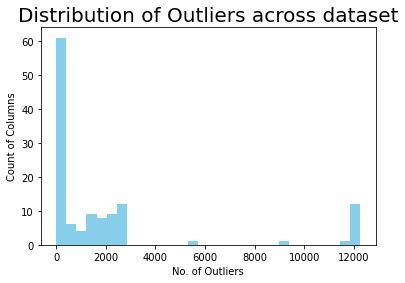

In [24]:
plt.hist(outliers_by_col.values(),
         bins=30,
         color="skyblue");
plt.title("Distribution of Outliers across dataset", fontsize=20)
plt.ylabel("Count of Columns")
plt.xlabel("No. of Outliers")
plt.savefig("../assets/images/dist-outliers")

# Correlation

In [16]:
main.describe()

sum_land_value_street  sum_bldg_value_street  sum_total_value_street  \
count           9.751500e+04           9.751500e+04            9.751500e+04   
mean            1.026189e+08           2.013818e+08            3.040007e+08   
std             1.161361e+09           1.413509e+09            2.269549e+09   
min             0.000000e+00           0.000000e+00            0.000000e+00   
25%             3.693800e+06           1.026120e+07            1.451720e+07   
50%             8.735260e+06           2.591186e+07            3.546480e+07   
75%             2.964212e+07           8.329224e+07            1.226704e+08   
max             2.642256e+10           2.997742e+10            3.798420e+10   

       sum_gross_tax_street  avg_land_value_street  avg_bldg_value_street  \
count          9.751500e+04           9.751500e+04           9.751500e+04   
mean           1.517246e+08           6.480362e+05           1.387491e+06   
std            5.001479e+08           4.935556e+06           9.478671e+06   
min            0.000000e+00           0.000000e+00           0.000000e+00   
25%            1.446606e+07           1.023300e+05           3.056879e+05   
50%            3.476093e+07           1.362808e+05           3.918064e+05   
75%            1.095945e+08           2.148053e+05           5.820125e+05   
max            9.915860e+09           2.919649e+08           3.658185e+08   

       avg_total_value_street  avg_gross_tax_street  sum_land_value_zip  \
count            9.751500e+04          9.751500e+04        9.751500e+04   
mean             2.035527e+06          1.313543e+06        5.788669e+09   
std              1.315711e+07          9.727829e+06        7.882870e+09   
min              0.000000e+00          0.000000e+00        4.910000e+04   
25%              4.230705e+05          4.294611e+05        1.640405e+09   
50%              5.366588e+05          5.350183e+05        2.959507e+09   
75%              8.048193e+05          7.557135e+05        5.225780e+09   
max              5.130820e+08          1.282705e+09        3.253956e+10   

       sum_bldg_value_zip  ...  avg_fire_content_loss_street  \
count        9.751500e+04  ...                  97515.000000   
mean         9.725150e+09  ...                     16.377588   
std          9.919700e+09  ...                    565.862373   
min          0.000000e+00  ...                      0.000000   
25%          3.525266e+09  ...                      0.000000   
50%          6.169687e+09  ...                      0.000000   
75%          1.266588e+10  ...                      0.000000   
max          6.128185e+10  ...                  83333.333333   

       avg_fire_content_loss_zip  req_latitude  req_longitude  \
count               97515.000000  97515.000000   97515.000000   
mean                   13.950316      0.141949      -0.238316   
std                    52.977468      2.447190       4.108547   
min                     0.000000      0.000000     -71.123200   
25%                     0.000000      0.000000       0.000000   
50%                     0.000000      0.000000       0.000000   
75%                     0.000000      0.000000       0.000000   
max                   423.821282     42.383300       0.000000   

       requests_total_street  requests_total_zip  req_open_status_prop  \
count           97515.000000        97515.000000          97515.000000   
mean                0.013259           40.392411              0.002605   
std                 0.343559          733.366457              0.097202   
min                 0.000000            0.000000              0.000000   
25%                 0.000000            0.000000              0.000000   
50%                 0.000000            0.000000              0.000000   
75%                 0.000000            0.000000              0.000000   
max                32.000000        15029.000000             12.000000   

       req_open_status_street  req_open_status_zip     label_zip  
count            97515.00000

**Correlation of Main**

**Correlation on Zipcode As Labels**

In [10]:
X_sel["label"] = main["label_zip"].copy()

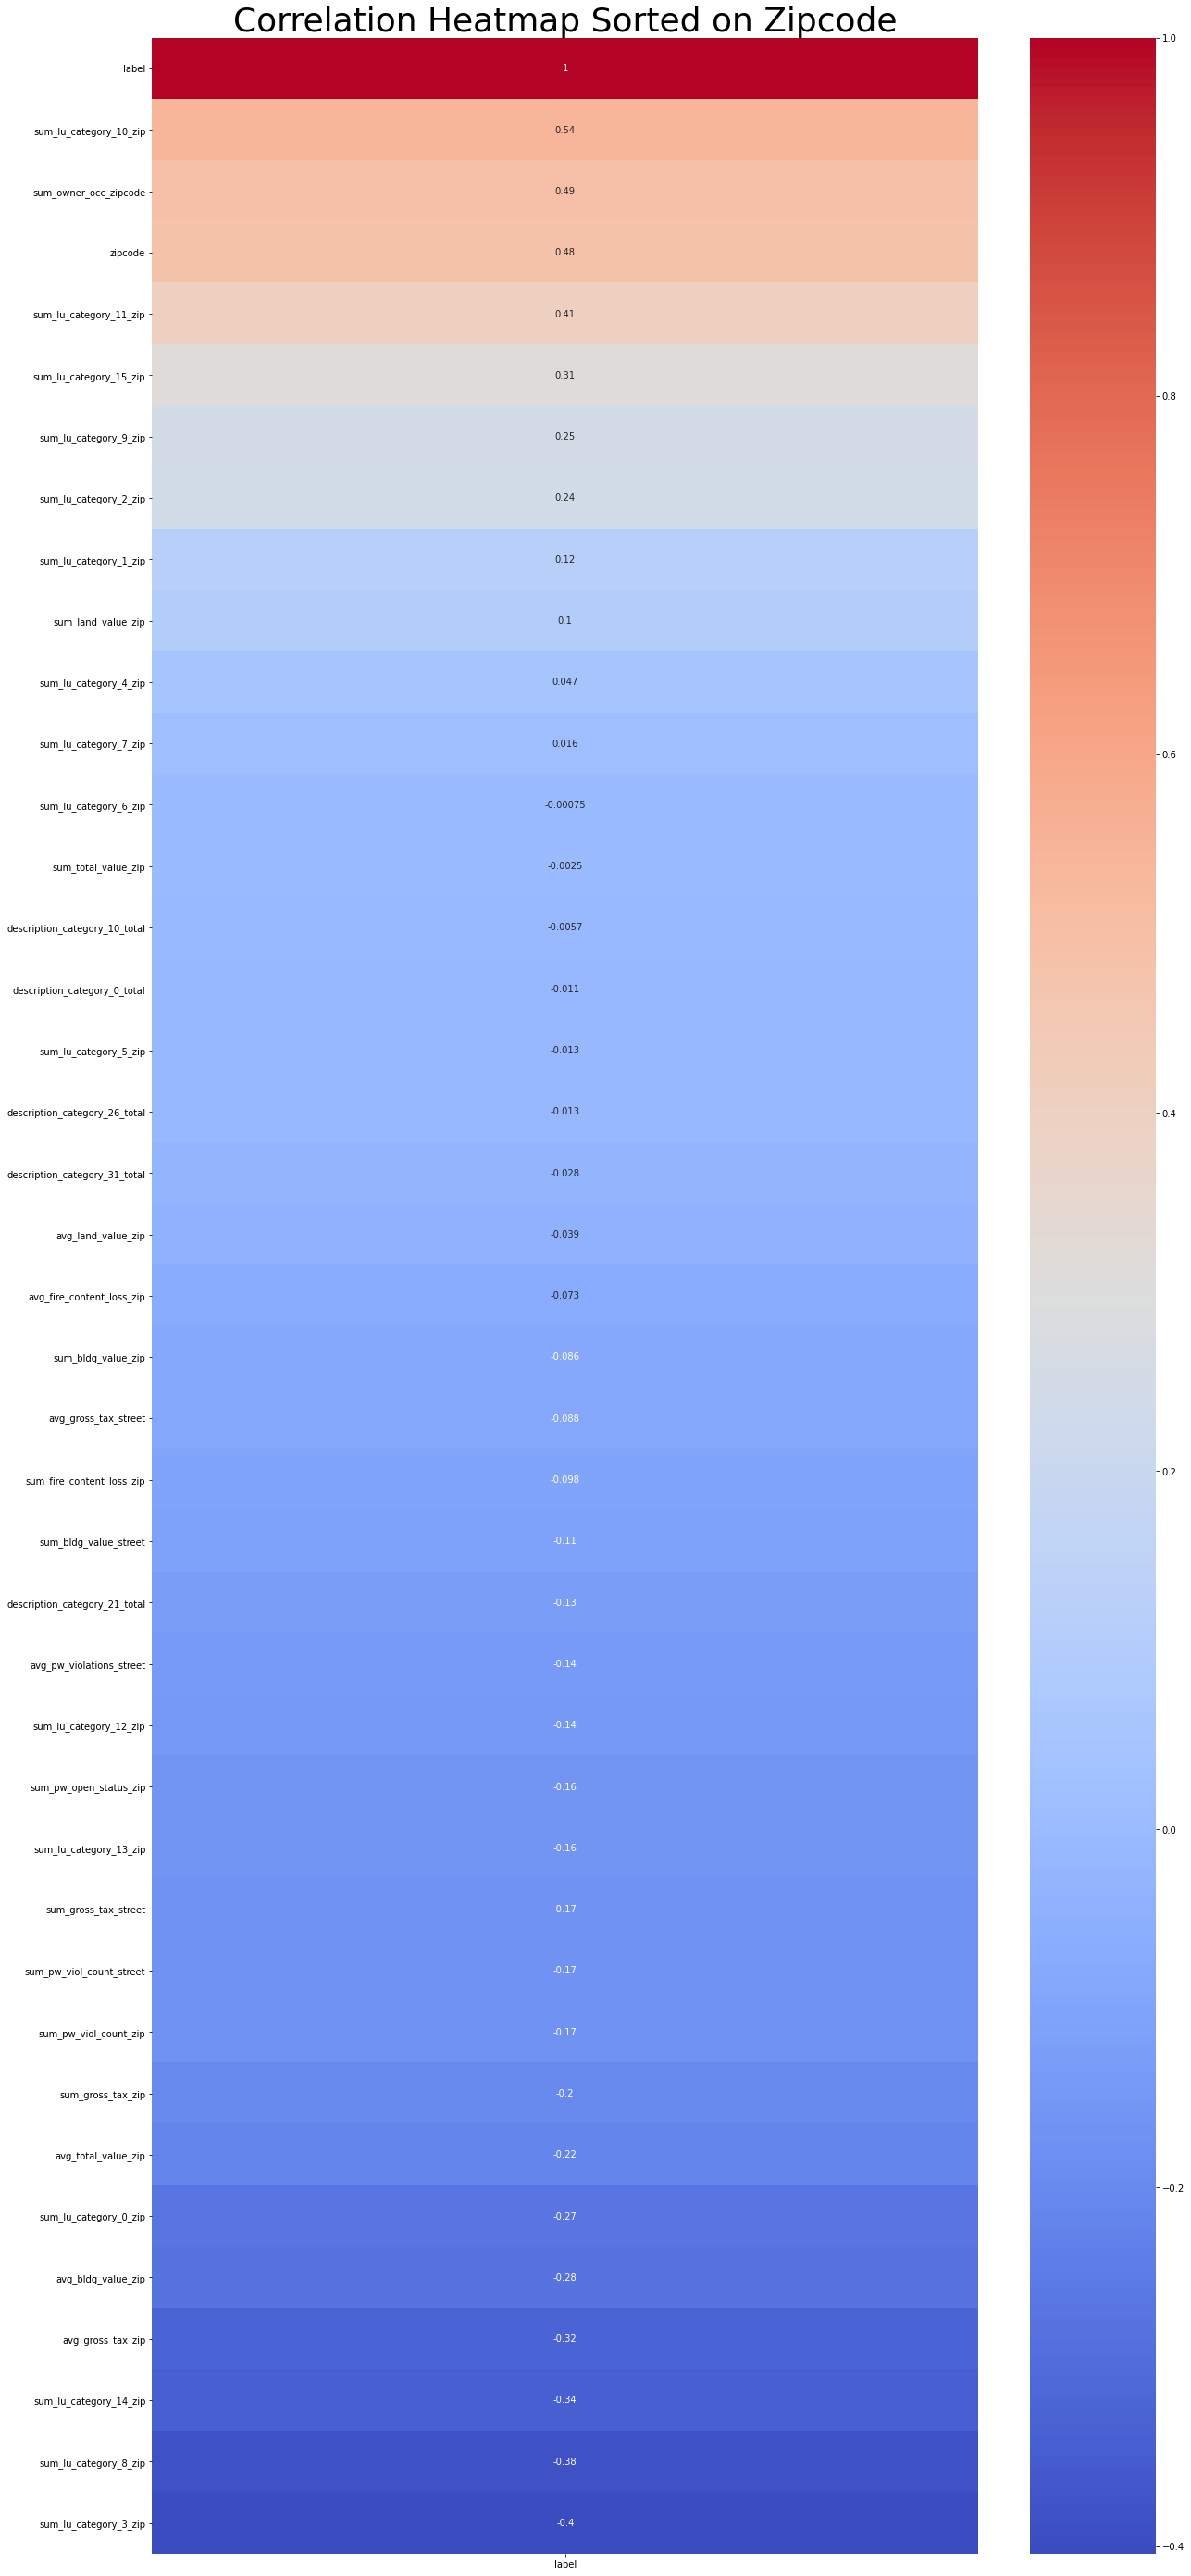

In [12]:
plt.figure(figsize=(20, 50))

plt.title("Correlation Heatmap Sorted on Zipcode", fontsize=36)
sns.heatmap(X_sel.corr()[["label"]].sort_values(by=["label"], ascending=False),
           cmap="coolwarm",
           annot=True)
plt.savefig("../assets/images/X_sel-heatmap");

# Histograms

**For organization of the outputs from the `.hist()` method, the histograms will be grouped together based on  the dataset they oirginated from.**

In [206]:
# for col_list in all_cols:
#     print(col_list)
#     main[col_list].hist()
#     print()

In [36]:
# DATA
# main[data_cols].hist(
#     figsize=(20, 40),
#     layout=(7, 3)
# );

In [37]:
# PW VIOLATIONS
# main[pw_cols].hist(
#     figsize=(18, 24),
#     layout=(11, 4)
# )
# plt.tight_layout();

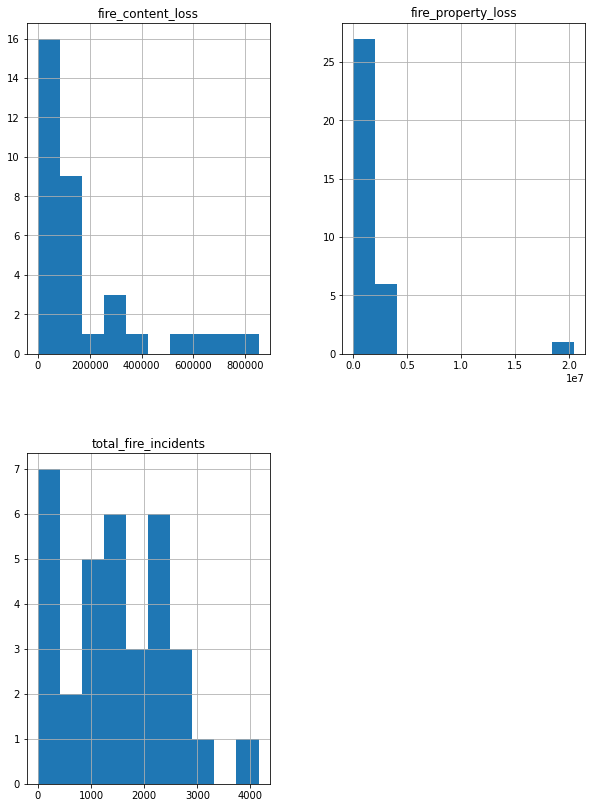

In [209]:
# FIRE 
main[fire_cols].hist(
    figsize=(10, 14)
);

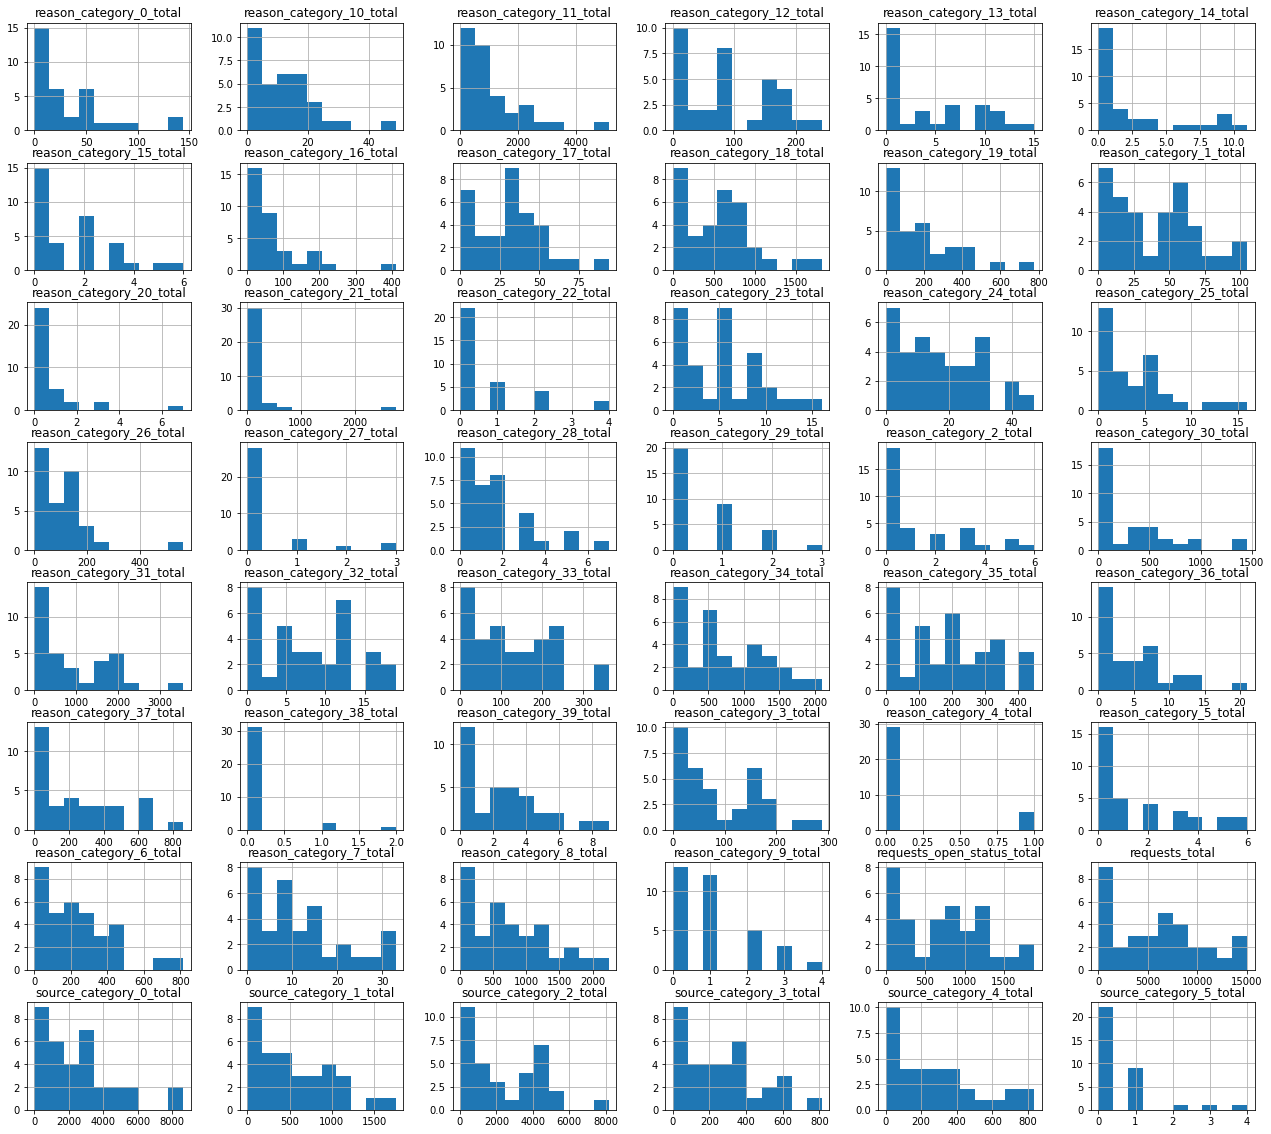

In [210]:
# REQUESTS
main[requests_cols].hist(
    figsize=(22, 20),
    layout=(8, 6)
);

## Data Plots

/home/patrick/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 1440x7200 with 0 Axes>

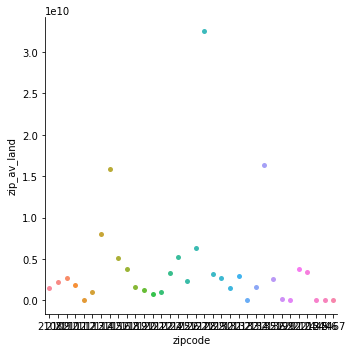

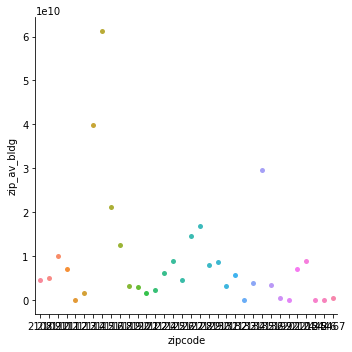

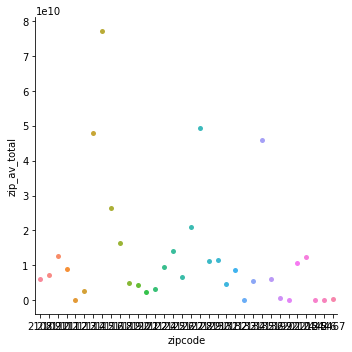

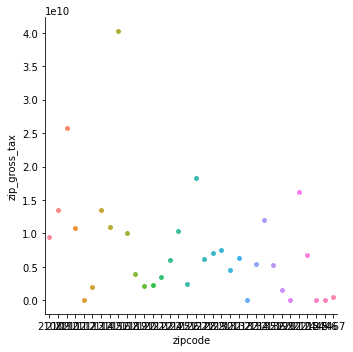

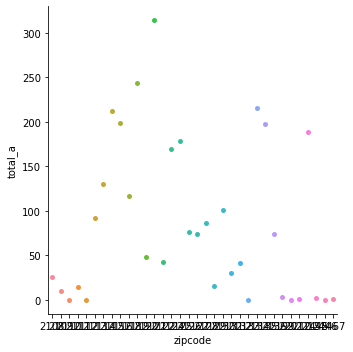

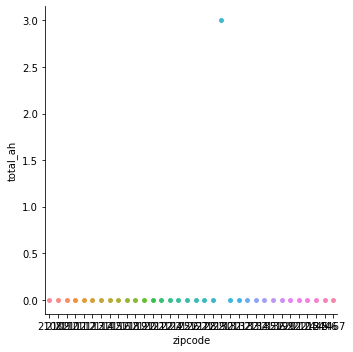

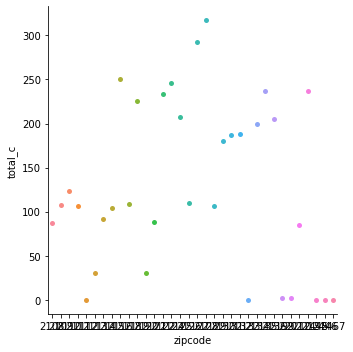

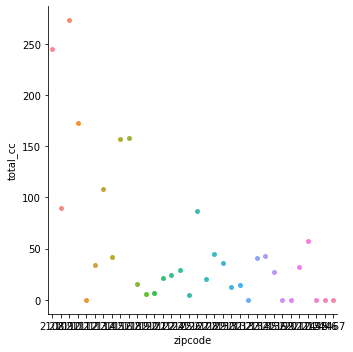

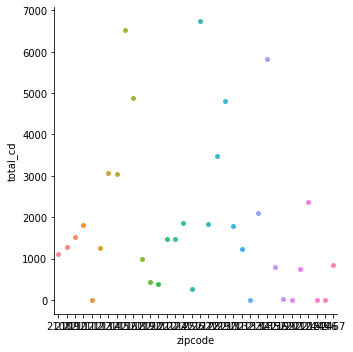

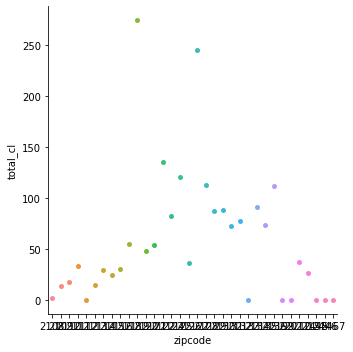

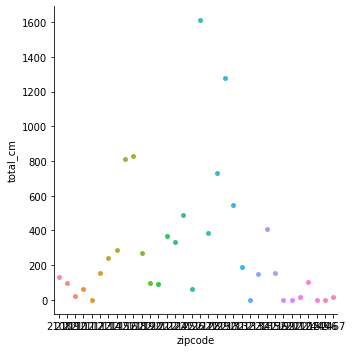

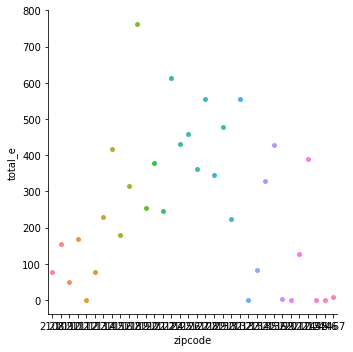

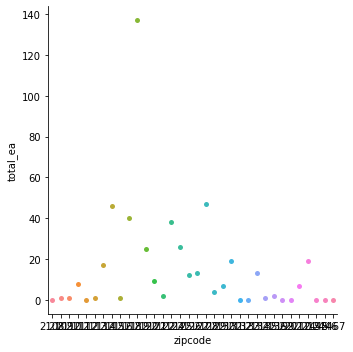

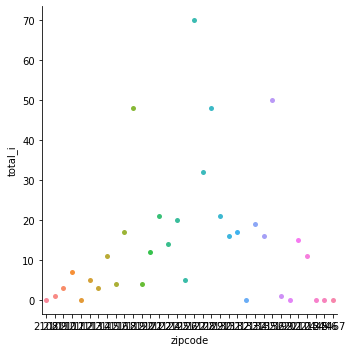

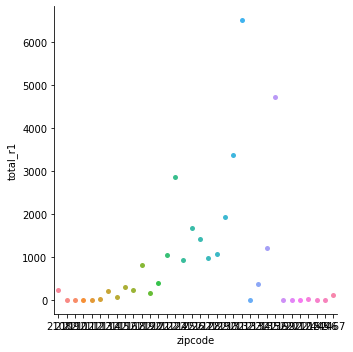

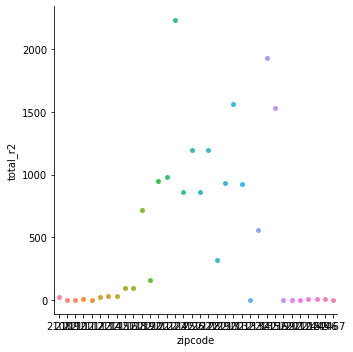

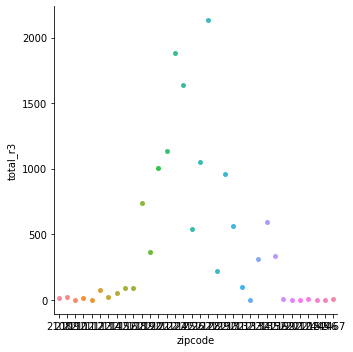

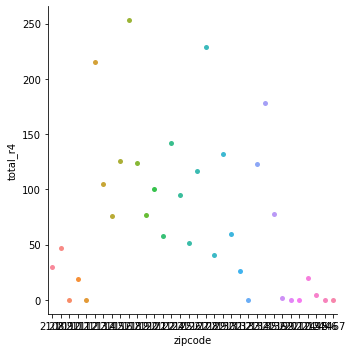

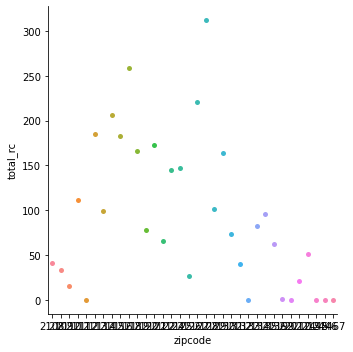

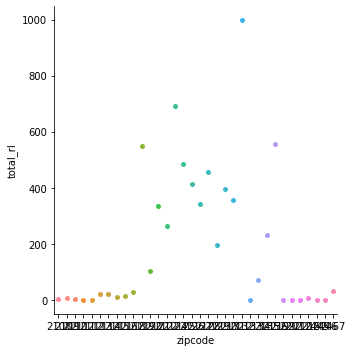

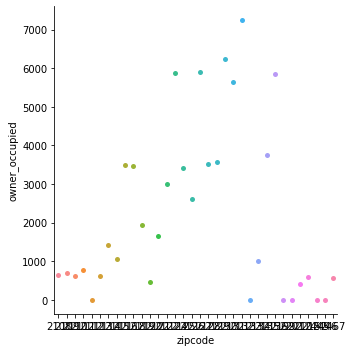

In [211]:
plt.figure(figsize=(20, 100))
for col in data_cols:
    sns.catplot(x="zipcode",
                y=col,
                kind="swarm",
                data=main)